# ABM macro-financiero para economías emergentes (LATAM): bancos privados vs banco público, informalidad y dolarización

## 1. Motivación (hechos estilizados y foco de conferencia)
En varias economías emergentes de LATAM conviven:
- Alta **informalidad laboral** (heterogeneidad fuerte de ingresos y acceso al crédito) [REF-ILO].
- Intermediación financiera con profundidad heterogénea (**crédito bancario/PIB**) [REF-WB-CREDIT].
- Grado relevante de **dolarización financiera** (depósitos/crédito en divisa), con episodios de **estrés FX** y restricciones de liquidez externa; la transición a regímenes más flexibles puede amplificar el canal balance-sheet [REF-IMF-BOL-FX].
- Presencia de **bancos públicos** (comerciales o de desarrollo) con mandato estabilizador: evidencia internacional sugiere que el crédito de banca pública puede ser **menos procíclico** (y, en algunos casos, contracíclico) [REF-BREI], aunque con riesgos de asignación, gobernanza y cuasi-fiscalidad [REF-IMF-SOB].

**Objetivo del modelo:** construir un ABM con balance-sheets donde un **banco público** actúa como amortiguador (credit smoothing) ante shocks reales y financieros, bajo restricciones prudenciales y fiscales, en un contexto con informalidad y dolarización.

---

## 2. Agentes y mercados
### 2.1 Agentes
1) **Hogares** $i=1,\dots,N_H$
- Estado laboral: formal/informal/desempleo.
- Portafolio: depósitos en moneda local $D^L_{i,t}$ y en divisa $D^\$_{i,t}$.
- Regla de consumo con restricción de liquidez (bounded rationality).

2) **Firmas** $j=1,\dots,N_F$
- Producción con trabajo formal e informal.
- Necesidad de capital de trabajo; demanda crédito a bancos.
- Default endógeno (probabilístico) según apalancamiento y demanda.

3) **Bancos privados** $b \in \mathcal{B}^{priv}$
- Ofertan crédito con reglas de riesgo, capital y liquidez.
- Ajustan spread con PD (probabilidad de default) y condiciones macro.

4) **Banco público** $b \in \mathcal{B}^{pub}$
- Mandato: sostener crédito (especialmente a pymes/informal) en recesión.
- Regla contracíclica sujeta a: (i) capital/regulación, (ii) fondeo, (iii) restricción fiscal (posible recapitalización).

5) **Banco Central**
- Tasa de política $i_t$, encaje diferenciado (local vs divisa), provisión de liquidez (LOLR).
- Regla de intervención FX con reservas $RIN_t$.

6) **Gobierno**
- Gasto $G_t$, impuestos (consumo y nómina), deuda $B_t$.
- Eventual recapitalización del banco público (cuasi-fiscal explícito).

### 2.2 Mercados
- Bienes (demanda hogares + gobierno; producción firmas; precios con ajuste parcial).
- Trabajo (segmentación formal/informal).
- Crédito (matching firma-banco; racionamiento).
- Depósitos (preferencias por moneda y riesgo; dolarización endógena).
- FX (tipo de cambio flexible administrado con intervención sujeta a reservas).

---

## 3. Bloque real: firmas y trabajo (informalidad)
### 3.1 Producción (con informalidad)
Usa una función tipo Cobb-Douglas con dos tipos de trabajo:
$$
y_{j,t} = A_{j,t}\,k_{j,t}^{\alpha}\,(l^{F}_{j,t})^{\beta_F}\,(l^{I}_{j,t})^{\beta_I},
\quad \alpha+\beta_F+\beta_I=1
$$

Ley de movimiento del capital:
$$
k_{j,t+1}=(1-\delta)k_{j,t}+I_{j,t}
$$

### 3.2 Demanda, inventarios y decisión de producción
Demanda agregada:
$$
D_t = \sum_i C_{i,t} + G_t
$$
Cada firma recibe una fracción (market share) $s_{j,t}$:
$$
\hat d_{j,t}=s_{j,t}\,D_t
$$

Producción efectiva con inventarios $inv_{j,t}$:
$$
q_{j,t}=\min\{\hat d_{j,t}+\bar{inv}-inv_{j,t},\; \bar q(k_{j,t},A_{j,t})\}
$$

### 3.3 Necesidad de financiamiento (capital de trabajo)
Caja requerida:
$$
WC_{j,t}=w^F_t l^F_{j,t}+w^I_t l^I_{j,t}+m\,q_{j,t}
$$
Crédito demandado:
$$
L^{dem}_{j,t}=\max\{0,\,WC_{j,t}-\text{cash}_{j,t}\}
$$

---

## 4. Bloque financiero: bancos, riesgo y crédito
### 4.1 Identidad de balance (simplificada)
Para cada banco $b$:
$$
Loans_{b,t} + Bonds_{b,t} + Res_{b,t} = Dep_{b,t} + Fnd_{b,t} + Eq_{b,t}
$$
(con opción de extender a balance en divisa: activos/pasivos en $\,\$$ y restricción de posición abierta).

### 4.2 Restricción de capital (Basilea “reducida”)
Activos ponderados por riesgo (RWA):
$$
RWA_{b,t} = \omega_L\,Loans_{b,t}+\omega_B\,Bonds_{b,t}+\omega_{FX}\,Loans^\$_{b,t}
$$
Ratio de capital:
$$
CAR_{b,t}=\frac{Eq_{b,t}}{RWA_{b,t}}\ge \kappa
$$
Esto define un máximo de crédito (capacidad):
$$
Loans^{max}_{b,t}=\frac{Eq_{b,t}}{\kappa\,\omega_L}
$$
(ajustable por liquidez y encajes).

### 4.3 Precio del crédito: tasa + spread por riesgo
Tasa de política:
$$
i_t = i^\star + \phi_\pi(\pi_t-\pi^\star)+\phi_y \tilde y_t+\phi_e \Delta \ln e_t
$$
Tasa activa banco-firma:
$$
r^{L}_{j,b,t}= i_t + \mu_b + \lambda\,\widehat{PD}_{j,t}
$$

### 4.4 Default endógeno (reducido)
Probabilidad de default (logit):
$$
\widehat{PD}_{j,t}=\sigma\!\left(a_0+a_1\,lev_{j,t}+a_2\,\Delta \ln sales_{j,t}-a_3\,profit_{j,t}\right)
$$
Pérdida esperada (LGD exógena):
$$
EL_{j,b,t}=\widehat{PD}_{j,t}\cdot LGD \cdot L_{j,b,t}
$$

---

## 5. Dolarización / desdolarización (portafolios y FX)
### 5.1 Portafolio de depósitos de hogares (regla conductual)
Fracción deseada en depósitos en divisa:
$$
s^\$_{i,t}=\sigma\!\left(\alpha_0+\alpha_1\,\mathbb{E}_t[\Delta \ln e_{t+1}] + \alpha_2\,\pi_t - \alpha_3\,cost^\$_t\right)
$$
y por lo tanto:
$$
D^\$_{i,t}=s^\$_{i,t}\,W_{i,t},\qquad D^L_{i,t}=(1-s^\$_{i,t})\,W_{i,t}
$$

### 5.2 Tipo de cambio flexible administrado + intervención
Demanda neta de divisa:
$$
FX^{net}_t = FX^{dem}_t - FX^{sup}_t
$$
Regla de flotación (ajuste por exceso de demanda, con shock):
$$
\Delta \ln e_t = \chi\,\frac{FX^{net}_t}{Y_t} + \varepsilon^e_t - \chi_{int}\,\frac{Int_t}{Y_t}
$$
Intervención sujeta a reservas:
$$
Int_t = \min\{ \bar{Int},\; \max(0,\; \psi_e(\Delta \ln e_t-\bar{d})),\; RIN_t-\underline{RIN}\}
$$
Dinámica de reservas:
$$
RIN_{t+1}=RIN_t + CA_t + KA_t - Int_t
$$

### 5.3 Instrumentos de desdolarización (política)
- Encaje diferenciado: $rr^\$>rr^L$ eleva $cost^\$_t$ y reduce $s^\$_{i,t}$.
- Límite de posición abierta FX y/o mayor $\omega_{FX}$ encarece crédito en $\,\$$.
- Impuesto a transacciones FX (estilo “macroprudential-tax”) incorporable en $cost^\$_t$.

---

## 6. Banco público como estabilizador (regla contracíclica)
Define brecha (potencial por promedio móvil):
$$
\tilde y_t=\frac{Y_t-\bar Y_t}{\bar Y_t}
$$
Regla de crecimiento objetivo del crédito del banco público:
$$
g^{L,pub}_t=\bar g - \psi_y\,\tilde y_t + \psi_u\,u_t
$$
Oferta efectiva (sujeta a capital y liquidez):
$$
Loans^{sup,pub}_t = \min\left\{Loans^{max}_{pub,t},\; (1+g^{L,pub}_t)\,Loans_{pub,t-1}\right\}
$$

**Recapitalización contingente (canal fiscal):**
si $CAR_{pub,t}<\kappa$ entonces el gobierno inyecta:
$$
Recap_t=\max\{0,\; \kappa\cdot RWA_{pub,t}-Eq_{pub,t}\}
$$
lo que impacta el déficit:
$$
DEF_t=G_t + Recap_t + i_t B_{t-1}-Tax_t
$$

---

## 7. Experimentos de conferencia (qué mostrar)
1) **Shock real:** caída de $A_t$ o demanda (consumo) → recesión.
2) **Shock FX / redolarización:** aumento súbito de $\alpha_1$ o caída de $\underline{RIN}$ → sube $s^\$_{i,t}$, presión en $e_t$, pass-through a $\pi_t$.
3) **Desdolarización creíble:** aumento de $cost^\$_t$ vía encaje/impuesto + credibilidad monetaria → baja $s^\$_{i,t}$, menor fragilidad FX.
4) Comparar **tres regímenes bancarios**:
   - Solo privados (más procíclico).
   - Privados + banco público (smoothing).
   - Privados + banco público + macroprudencial FX (menor mismatch).

**Outputs clave:**
- Crédito/PIB, NPL/Loans, CAR por tipo de banco.
- Distribución de $s^\$_{i,t}$ (heterogeneidad de dolarización).
- Desigualdad de riqueza (p.ej., Gini) y acceso al crédito formal vs informal.
- Volatilidad de $Y_t$, $\pi_t$, $\Delta \ln e_t$.

---

## 8. Calibración “LATAM-plausible” (targets iniciales)
Sugerencia de targets (para fijar parámetros de transición laboral, profundidad financiera y dolarización):
- Informalidad: Bolivia, Perú, Brasil, Argentina, Paraguay [REF-ILO].
- Crédito bancario/PIB: Bolivia, Brasil, Argentina (y valores de referencia para Perú y Paraguay) [REF-WB-CREDIT].
- Relevancia banca pública: indicadores por país (participación, rol en crédito hipotecario, depósitos, etc.) [REF-PUBBANKS].

---

## 9. Extensiones de frontera (agenda de investigación)
1) **Redes** firma-banco + mercado interbancario: contagio y “credit crunch”.
2) **Soberano-banco**: tenencia de bonos públicos y dominancia fiscal (riesgo de “doom loop”).
3) **Heterogeneidad rica**: hogares con expectativas heterogéneas (learning) y fricciones de pagos.
4) **Estimación estructural**: Method of Simulated Moments / Bayesiano con momentos de micro-balance bancario.
5) **Política óptima bajo restricciones**: regla conjunta (tasa + encaje + intervención) con pérdida social.


C:\Users\CESAR\AppData\Local\Temp\ipykernel_636\4263206803.py:335: RuntimeWarning: overflow encountered in scalar multiply
  e_new = e * np.exp(dloge)


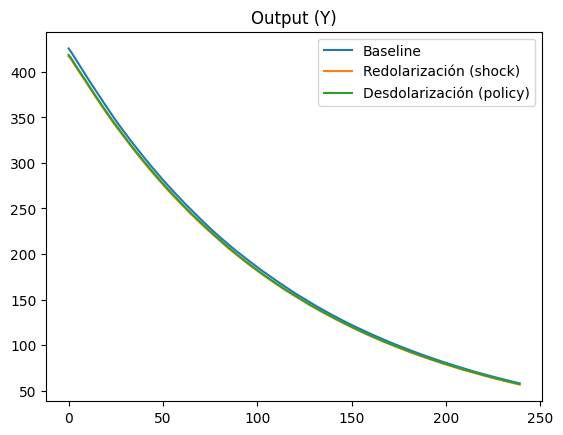

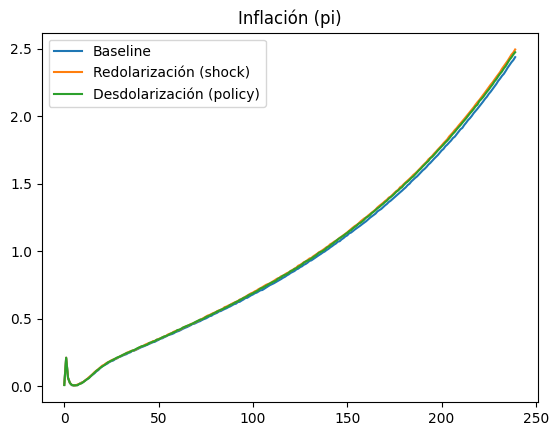

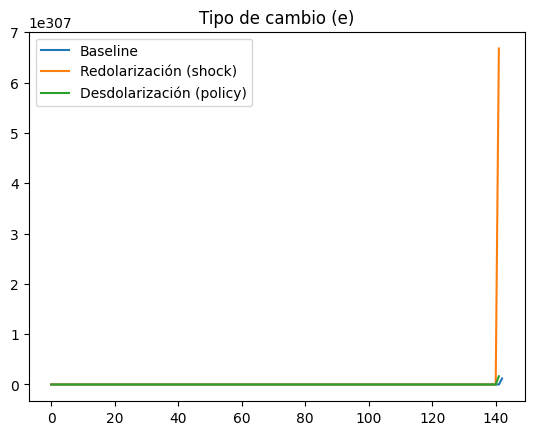

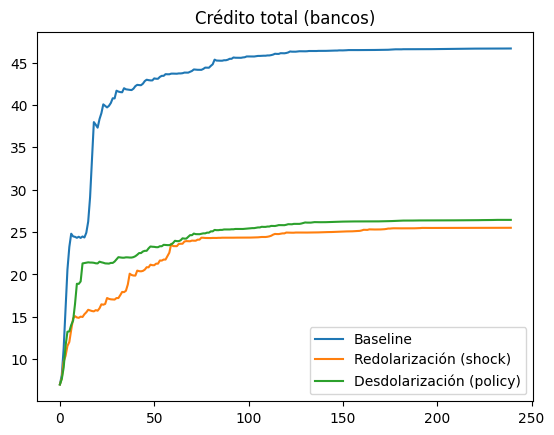

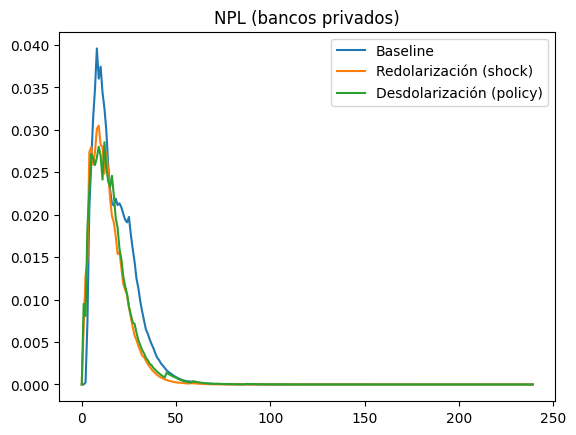

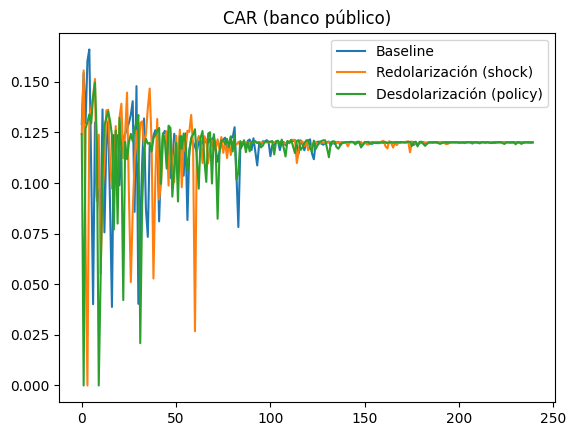

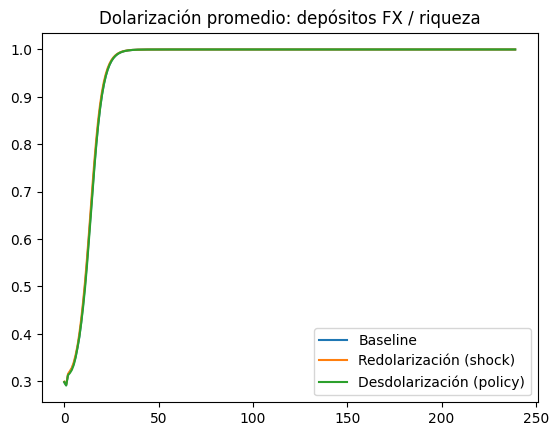

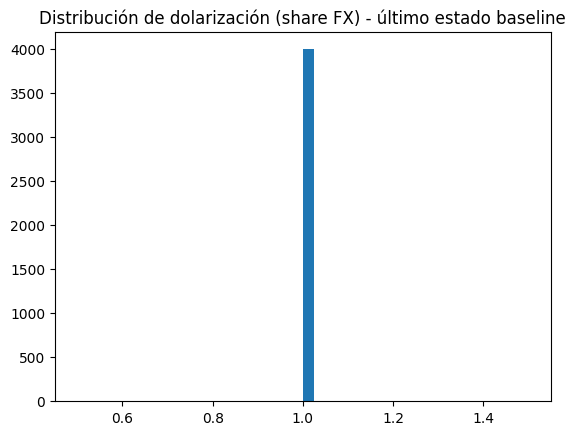

In [1]:
# ============================================
# ABM macro-financiero (LATAM) - plantilla base
# Hogares + Firmas + Bancos privados + Banco público
# + dolarización (depósitos) + FX managed float
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------
# 1) Parámetros (ajusta)
# -----------------------
PAR = {
    # Horizonte
    "T": 240,            # meses
    "seed": 123,

    # Poblaciones
    "N_H": 4000,
    "N_F": 400,
    "N_B_priv": 6,

    # Real
    "alpha": 0.35,       # capital share
    "betaF": 0.45,
    "betaI": 0.20,
    "delta": 0.02,       # depreciación mensual aprox.
    "m_input": 0.15,     # insumos por unidad (import share simplificado)

    # Trabajo
    "wF": 1.00,          # salario formal (normalizado)
    "wI": 0.65,          # salario informal
    "tax_payroll": 0.10, # impuesto a nómina formal (simple)
    "p_formal": 0.35,    # prob. base de formalidad (ajustar para target informalidad)
    "p_unemp": 0.07,

    # Consumo (regla conductual)
    "mpc_y": 0.75,
    "mpc_w": 0.02,

    # Bancos (balance y prudencia)
    "kappa": 0.12,       # CAR mínimo (12%)
    "omega_L": 1.00,
    "omega_FX": 1.20,    # mayor RW para crédito en FX
    "LGD": 0.55,
    "mu_priv": 0.03,     # markup privado
    "mu_pub": 0.01,      # markup banco público (más bajo)
    "lambda_pd": 0.15,   # sensibilidad del spread a PD

    # Política monetaria (regla simple)
    "i_star": 0.01/12,   # 1% anual aprox, en mensual
    "pi_star": 0.03/12,  # 3% anual objetivo aprox
    "phi_pi": 1.6,
    "phi_y": 0.3,
    "phi_e": 0.1,

    # Precios / inflación
    "price_adj": 0.25,   # ajuste parcial de precios
    "pass_through": 0.10,# pass-through FX->inflación (mensual reducido)

    # FX y dolarización
    "e0": 7.0,           # tipo de cambio inicial (escala)
    "chi_fx": 0.20,      # sensibilidad del TC al exceso demanda FX
    "shock_fx_sd": 0.015,

    # Reserva e intervención
    "RIN0": 1.0,         # reservas en unidades de PIB normalizado
    "RIN_floor": 0.25,
    "int_cap": 0.02,     # máximo intervención mensual (en unidades Y)
    "psi_int": 0.8,      # agresividad intervención
    "dep_band": 0.01,    # umbral de depreciación mensual para intervenir

    # Dolarización (logit)
    "a0_fx": -0.8,
    "a1_expDep": 6.0,
    "a2_pi": 2.0,
    "a3_cost": 3.0,
    "cost_fx0": 0.10,    # costo "regulatorio" de depósitos FX (encaje/impuesto)

    # Banco público contracíclico
    "gbar_pub": 0.002,   # crecimiento base de crédito mensual
    "psi_y_pub": 0.6,
    "psi_u_pub": 0.4,

    # Fiscal
    "G_share": 0.18,     # gasto gobierno como share de Y (simplificado)
    "tax_c": 0.10,       # IVA
}

rng = np.random.default_rng(PAR["seed"])

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# -----------------------
# 2) Inicialización
# -----------------------
def init_agents(P):
    N_H, N_F = P["N_H"], P["N_F"]
    # Hogares: riqueza y estado laboral
    W = np.exp(rng.normal(-0.2, 0.7, N_H))   # riqueza positiva (lognormal)
    emp = np.zeros(N_H, dtype=int)           # 0 desempleo, 1 formal, 2 informal

    # asignación inicial de empleo con targets aproximados
    u = rng.random(N_H)
    emp[u < P["p_unemp"]] = 0
    emp[(u >= P["p_unemp"]) & (u < P["p_unemp"] + P["p_formal"])] = 1
    emp[u >= P["p_unemp"] + P["p_formal"]] = 2

    # dolarización inicial (share FX depósitos)
    sfx = sigmoid(P["a0_fx"] + rng.normal(0, 0.3, N_H))
    DL = (1 - sfx) * W
    DF = sfx * W

    # Firmas
    A = np.exp(rng.normal(0.0, 0.15, N_F))
    K = np.exp(rng.normal(0.1, 0.35, N_F))
    cash = np.exp(rng.normal(-0.3, 0.5, N_F))
    debt = np.zeros(N_F)
    inv = np.zeros(N_F)
    price = np.ones(N_F)

    # Bancos: privados + 1 público
    N_B = P["N_B_priv"] + 1
    bank_type = np.array(["priv"] * P["N_B_priv"] + ["pub"])
    Eq = np.ones(N_B) * 0.12     # equity inicial
    Loans = np.ones(N_B) * 0.50  # cartera inicial
    Dep = np.ones(N_B) * 0.55    # depósitos
    Res = np.ones(N_B) * 0.07    # reservas (simplificado)
    NPL = np.zeros(N_B)

    # Matching firma->banco (relación estable)
    firm_bank = rng.integers(0, N_B, N_F)

    return {
        "H": {"W": W, "emp": emp, "sfx": sfx, "DL": DL, "DF": DF},
        "F": {"A": A, "K": K, "cash": cash, "debt": debt, "inv": inv, "price": price, "bank": firm_bank},
        "B": {"type": bank_type, "Eq": Eq, "Loans": Loans, "Dep": Dep, "Res": Res, "NPL": NPL},
    }

# -----------------------
# 3) Módulos del modelo
# -----------------------
def policy_rate(P, pi, y_gap, dloge):
    return (P["i_star"]
            + P["phi_pi"] * (pi - P["pi_star"])
            + P["phi_y"] * y_gap
            + P["phi_e"] * dloge)

def household_step(P, H, i_rate, pi, expDep, cost_fx):
    emp = H["emp"]
    # ingreso laboral (simplificado)
    wF, wI = P["wF"], P["wI"]
    inc = np.zeros_like(emp, dtype=float)
    inc[emp == 1] = (1 - P["tax_payroll"]) * wF
    inc[emp == 2] = wI
    inc[emp == 0] = 0.15 * wI  # transferencias mínimas / informal coping

    W = H["DL"] + H["DF"]
    C = P["mpc_y"] * inc + P["mpc_w"] * W
    C = np.minimum(C, 0.95 * (inc + W))  # restricción de liquidez simple

    # dolarización: share FX deseado (logit)
    sfx_des = sigmoid(P["a0_fx"] + P["a1_expDep"] * expDep + P["a2_pi"] * pi - P["a3_cost"] * cost_fx
                      + rng.normal(0, 0.15, len(W)))
    # ajuste parcial de portafolio
    adj = 0.25
    sfx_new = (1 - adj) * H["sfx"] + adj * sfx_des

    # actualización de riqueza neta (muy reducida): W' = (W + inc - C)
    W_new = np.maximum(1e-6, W + inc - C)
    DL = (1 - sfx_new) * W_new
    DF = sfx_new * W_new

    H.update({"W": W_new, "sfx": sfx_new, "DL": DL, "DF": DF})
    return C, inc

def firm_step(P, F, D_agg, i_rate, pi):
    N_F = len(F["A"])
    # asignación de demanda por market share (proporcional a productividad y tamaño)
    ms = F["A"] * (F["K"] ** P["alpha"])
    ms = ms / ms.sum()
    d_hat = ms * D_agg

    # capacidad de producción
    cap = F["A"] * (F["K"] ** P["alpha"])
    q = np.minimum(d_hat + 0.05 - F["inv"], cap)

    # insumos importados simplificados
    inputs = P["m_input"] * q
    # demanda de trabajo formal/informal (reglas reducidas)
    lF = 0.55 * q
    lI = 0.35 * q

    wage_bill = P["wF"] * lF + P["wI"] * lI
    WC = wage_bill + inputs

    # crédito demandado
    L_dem = np.maximum(0.0, WC - F["cash"])

    # actualización de inventarios
    sales = np.minimum(q + F["inv"], d_hat)
    inv_new = np.maximum(0.0, F["inv"] + q - sales)

    # precio (ajuste parcial a presión de demanda)
    # markup al alza si ventas cerca de demanda
    pressure = (sales / (d_hat + 1e-9))
    price_target = 1.0 + 0.10 * (pressure - 0.95)
    price_new = (1 - P["price_adj"]) * F["price"] + P["price_adj"] * price_target
    price_new = np.maximum(0.5, price_new)

    # "beneficio" aproximado
    rev = price_new * sales
    prof = rev - wage_bill - inputs - (i_rate * F["debt"])
    # cash antes del crédito
    cash_pre = np.maximum(1e-6, F["cash"] + prof)

    F.update({"inv": inv_new, "price": price_new, "cash_pre": cash_pre, "sales": sales, "prof": prof,
              "L_dem": L_dem, "lF": lF, "lI": lI, "q": q})
    return sales.sum(), inputs.sum()

def pd_function(F, P):
    # leverage y crecimiento de ventas (aprox)
    lev = F["debt"] / (F["K"] + 1e-6)
    dlsales = np.log((F["sales"] + 1e-6) / (getattr(pd_function, "sales_lag", F["sales"] + 1e-6)))
    pd_function.sales_lag = F["sales"].copy()

    x = (-2.0
         + 1.8 * lev
         - 1.2 * dlsales
         - 0.6 * (F["prof"] > 0).astype(float))
    PD = sigmoid(x)
    return PD

def bank_credit_allocation(P, F, B, i_rate, y_gap, unemp_rate):
    N_B = len(B["Eq"])
    PD = pd_function(F, P)

    # capacidad de crédito por banco (capital constraint)
    Loans_max = B["Eq"] / (P["kappa"] * P["omega_L"])
    Loans_cap = np.maximum(0.0, Loans_max - B["Loans"])

    # regla del banco público: aumentar capacidad efectiva en recesión (sujeto a cap)
    is_pub = (B["type"] == "pub")
    g_pub = P["gbar_pub"] - P["psi_y_pub"] * y_gap + P["psi_u_pub"] * unemp_rate
    g_pub = np.clip(g_pub, -0.02, 0.05)

    # multiplicador de oferta para el público (pero nunca excede Loans_cap+existing max)
    pub_mult = 1.0 + g_pub
    Loans_cap_eff = Loans_cap.copy()
    Loans_cap_eff[is_pub] = Loans_cap_eff[is_pub] * pub_mult

    # spreads
    mu = np.where(is_pub, P["mu_pub"], P["mu_priv"])
    rL = i_rate + mu

    # asignación por firma: relación primaria banco
    bank_id = F["bank"]
    L_dem = F["L_dem"]

    # scoring: menor PD, mayor prioridad
    score = 1.0 - PD

    # ordenar firmas por score dentro de cada banco
    L_granted = np.zeros_like(L_dem)
    for b in range(N_B):
        idx = np.where(bank_id == b)[0]
        if len(idx) == 0:
            continue
        # firmas ordenadas
        idx_sorted = idx[np.argsort(-score[idx])]
        cap = Loans_cap_eff[b]
        for j in idx_sorted:
            if cap <= 0:
                break
            take = min(L_dem[j], cap)
            L_granted[j] = take
            cap -= take

    # tasas por firma: tasa base del banco + componente PD
    rL_j = rL[bank_id] + P["lambda_pd"] * PD

    return L_granted, rL_j, PD

def defaults_and_bank_update(P, F, B, L_granted, rL_j, PD):
    # Actualizar deuda y caja de firmas con el crédito
    F["debt"] = F["debt"] + L_granted
    F["cash"] = F["cash_pre"] + L_granted

    # Evento de default: Bernoulli(PD)
    default = (rng.random(len(PD)) < PD).astype(int)

    # Pérdidas bancarias por LGD
    bank_id = F["bank"]
    loss_by_bank = np.zeros(len(B["Eq"]))
    interest_income_by_bank = np.zeros(len(B["Eq"]))

    for j in range(len(PD)):
        b = bank_id[j]
        # interés cobrado sobre deuda performing (simplificado)
        interest_income_by_bank[b] += (1 - default[j]) * (rL_j[j] * F["debt"][j])
        if default[j] == 1:
            loss = P["LGD"] * F["debt"][j]
            loss_by_bank[b] += loss
            # reset parcial de firma tras default (reestructuración)
            F["debt"][j] = 0.15 * F["debt"][j]   # haircut
            F["cash"][j] = 0.80 * F["cash"][j]
            F["K"][j] = 0.97 * F["K"][j]         # pérdida de capital

    # Update bancos: equity = equity + ingresos - pérdidas
    B["Eq"] = np.maximum(1e-6, B["Eq"] + interest_income_by_bank - loss_by_bank)

    # cartera: aproxima crecimiento por crédito neto (menos write-off por default)
    # (simplificado: write-off proporcional a pérdidas)
    B["Loans"] = np.maximum(0.0, B["Loans"] + np.bincount(bank_id, weights=L_granted, minlength=len(B["Eq"]))
                            - 0.25 * loss_by_bank)

    # NPL proxy
    B["NPL"] = 0.85 * B["NPL"] + 0.15 * (loss_by_bank / (B["Loans"] + 1e-9))

    return default.mean(), loss_by_bank.sum()

def fx_block(P, e, Y, FX_dem, FX_sup, RIN, dloge_raw):
    FX_net = FX_dem - FX_sup

    # intervención si hay espacio en reservas y la depreciación excede banda
    Int = 0.0
    if (RIN > P["RIN_floor"]) and (dloge_raw > P["dep_band"]):
        Int = min(P["int_cap"] * Y, P["psi_int"] * (dloge_raw - P["dep_band"]) * Y, max(0.0, RIN - P["RIN_floor"]))

    # ajuste del tipo de cambio
    shock = rng.normal(0, P["shock_fx_sd"])
    dloge = P["chi_fx"] * (FX_net / (Y + 1e-9)) + shock - P["chi_fx"] * (Int / (Y + 1e-9))
    e_new = e * np.exp(dloge)

    # reservas
    CA = 0.02 * Y - 0.6 * FX_dem  # muy reducido: export neto menos demanda FX
    KA = 0.0
    RIN_new = max(0.0, RIN + CA + KA - Int)

    return e_new, dloge, RIN_new, Int

# -----------------------
# 4) Simulación
# -----------------------
def run_simulation(P, scenario=None):
    st = init_agents(P)
    H, F, B = st["H"], st["F"], st["B"]

    # Macro inicial
    e = P["e0"]
    RIN = P["RIN0"]
    P_level = 1.0
    Y_pot_ma = 1.0
    expDep = 0.0
    pi = P["pi_star"]
    cost_fx = P["cost_fx0"]

    # resultados
    out = {
        "Y": [], "pi": [], "e": [], "dloge": [], "i": [], "RIN": [], "Int": [],
        "credit": [], "NPL_priv": [], "NPL_pub": [], "CAR_pub": [], "CAR_priv": [],
        "unemp": [], "informal": [], "sfx_mean": [], "default_rate": [], "loss_total": [],
        "G": [], "tax": [], "deficit": []
    }

    # helpers
    N_H = P["N_H"]
    for t in range(P["T"]):
        # ---- escenarios (shocks/policy) ----
        if scenario is not None:
            # ejemplo: "redolarización" a partir de t0
            if scenario.get("type") == "redolarization":
                if t == scenario.get("t0", 60):
                    P = dict(P)  # copia superficial
                    P["a1_expDep"] *= scenario.get("mult_a1", 1.5)
            # ejemplo: "desdolarización" vía mayor costo FX
            if scenario.get("type") == "dedollarization":
                if t == scenario.get("t0", 60):
                    cost_fx = cost_fx + scenario.get("delta_cost", 0.12)

        # ---- mercado laboral: transición simple para mantener tasas ----
        # (puedes reemplazar por Markov calibrado)
        u = rng.random(N_H)
        emp = H["emp"].copy()
        # shock cíclico suave: más desempleo si recesión previa
        # (usamos última Y para aproximar)
        y_prev = out["Y"][-1] if t > 0 else 1.0
        cyc = np.clip(1.0 - y_prev, -0.2, 0.3)

        p_unemp_t = np.clip(P["p_unemp"] + 0.10 * cyc, 0.03, 0.20)
        p_formal_t = np.clip(P["p_formal"] - 0.08 * cyc, 0.15, 0.55)

        emp[u < p_unemp_t] = 0
        emp[(u >= p_unemp_t) & (u < p_unemp_t + p_formal_t)] = 1
        emp[u >= p_unemp_t + p_formal_t] = 2
        H["emp"] = emp

        unemp_rate = (emp == 0).mean()
        informal_rate = (emp == 2).mean()

        # ---- expectativas (adaptativas) ----
        expDep = 0.85 * expDep + 0.15 * (out["dloge"][-1] if t > 0 else 0.0)

        # ---- brecha de producto (aprox con promedio móvil) ----
        Y_lag = out["Y"][-1] if t > 0 else 1.0
        Y_pot_ma = 0.98 * Y_pot_ma + 0.02 * Y_lag
        y_gap = (Y_lag - Y_pot_ma) / (Y_pot_ma + 1e-9)

        # ---- tasa de política ----
        i_rate = policy_rate(P, pi, y_gap, out["dloge"][-1] if t > 0 else 0.0)
        i_rate = np.clip(i_rate, -0.002, 0.04)  # piso/techo simple

        # ---- hogares: consumo + portafolio ----
        C, inc = household_step(P, H, i_rate, pi, expDep, cost_fx)

        # ---- gobierno: gasto e impuestos ----
        Y_guess = Y_lag
        G = P["G_share"] * Y_guess
        Tax = P["tax_c"] * (C.sum() + G)

        # ---- firmas: producción, ventas, demanda crédito ----
        D_agg = C.sum() + G
        Y, imports = firm_step(P, F, D_agg, i_rate, pi)

        # ---- crédito: asignación bancos ----
        L_granted, rL_j, PD = bank_credit_allocation(P, F, B, i_rate, y_gap, unemp_rate)

        # ---- defaults y bancos ----
        def_rate, loss_total = defaults_and_bank_update(P, F, B, L_granted, rL_j, PD)

        # ---- recapitalización del banco público (fiscal) ----
        is_pub = (B["type"] == "pub")
        RWA_pub = P["omega_L"] * B["Loans"][is_pub].sum()
        CAR_pub = (B["Eq"][is_pub].sum()) / (RWA_pub + 1e-9)
        Recap = 0.0
        if CAR_pub < P["kappa"]:
            Recap = max(0.0, P["kappa"] * RWA_pub - B["Eq"][is_pub].sum())
            # inyección entra como equity del banco público
            B["Eq"][is_pub] += Recap

        deficit = G + Recap - Tax

        # ---- FX: demanda por dolarización + import share ----
        # Demanda FX de hogares: cambios en depósitos FX (en unidades de PIB normalizado)
        DF = H["DF"].sum()
        DF_lag = out["sfx_mean"][-1] if t > 0 else DF / (H["W"].sum() + 1e-9)
        FX_dem = 0.20 * DF + 0.50 * imports   # proxy
        FX_sup = 0.22 * Y                     # proxy export supply

        dloge_raw = P["chi_fx"] * ((FX_dem - FX_sup) / (Y + 1e-9))
        e, dloge, RIN, Int = fx_block(P, e, Y, FX_dem, FX_sup, RIN, dloge_raw)

        # ---- precios e inflación (core + pass-through) ----
        P_core = 1.0 + 0.02 * y_gap
        P_level_new = (1 - P["price_adj"]) * P_level + P["price_adj"] * P_core
        pi = np.log(P_level_new / P_level) + P["pass_through"] * dloge
        P_level = P_level_new

        # ---- estadísticas bancarias ----
        credit = B["Loans"].sum()
        NPL_priv = B["NPL"][~is_pub].mean()
        NPL_pub = B["NPL"][is_pub].mean()

        RWA_priv = (P["omega_L"] * B["Loans"][~is_pub]).sum()
        CAR_priv = (B["Eq"][~is_pub].sum()) / (RWA_priv + 1e-9)

        # ---- guardar outputs ----
        out["Y"].append(Y)
        out["pi"].append(pi)
        out["e"].append(e)
        out["dloge"].append(dloge)
        out["i"].append(i_rate)
        out["RIN"].append(RIN)
        out["Int"].append(Int)
        out["credit"].append(credit)
        out["NPL_priv"].append(NPL_priv)
        out["NPL_pub"].append(NPL_pub)
        out["CAR_pub"].append(CAR_pub)
        out["CAR_priv"].append(CAR_priv)
        out["unemp"].append(unemp_rate)
        out["informal"].append(informal_rate)
        out["sfx_mean"].append(H["DF"].sum() / (H["W"].sum() + 1e-9))
        out["default_rate"].append(def_rate)
        out["loss_total"].append(loss_total)
        out["G"].append(G)
        out["tax"].append(Tax)
        out["deficit"].append(deficit)

        # ---- dinámica capital firmas ----
        # inversión simple (acelerador y costo financiero)
        I = np.maximum(0.0, 0.02 * (F["sales"] - 0.9) - 0.5 * i_rate)
        F["K"] = (1 - P["delta"]) * F["K"] + I

    return pd.DataFrame(out), st

# -----------------------
# 5) Corridas: baseline + escenarios
# -----------------------
df_base, st_base = run_simulation(PAR, scenario=None)

df_pub = df_base.copy()  # (en este template ya existe banco público por defecto)

df_redol, _ = run_simulation(PAR, scenario={"type": "redolarization", "t0": 80, "mult_a1": 1.7})
df_dedol, _ = run_simulation(PAR, scenario={"type": "dedollarization", "t0": 80, "delta_cost": 0.15})

# -----------------------
# 6) Gráficos básicos (conferencia)
# -----------------------
def plot_compare(series, label):
    plt.figure()
    plt.plot(df_base[series].values, label="Baseline")
    plt.plot(df_redol[series].values, label="Redolarización (shock)")
    plt.plot(df_dedol[series].values, label="Desdolarización (policy)")
    plt.title(label)
    plt.legend()
    plt.show()

plot_compare("Y", "Output (Y)")
plot_compare("pi", "Inflación (pi)")
plot_compare("e", "Tipo de cambio (e)")
plot_compare("credit", "Crédito total (bancos)")
plot_compare("NPL_priv", "NPL (bancos privados)")
plot_compare("CAR_pub", "CAR (banco público)")
plot_compare("sfx_mean", "Dolarización promedio: depósitos FX / riqueza")

# -----------------------
# 7) Distribución de dolarización de hogares (cross-section)
# -----------------------
H = st_base["H"]
plt.figure()
plt.hist(H["sfx"], bins=40)
plt.title("Distribución de dolarización (share FX) - último estado baseline")
plt.show()
